# Linear Regression Demo
- Gradient desent methold
- Math formula methold

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

## 随机散点图

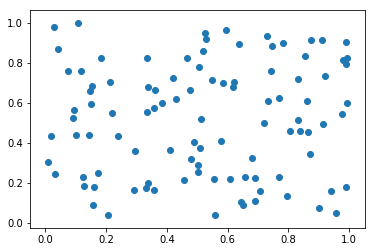

In [3]:
DataX=np.random.rand(100)
DataY=np.random.rand(100)
plt.scatter(DataX,DataY)

# 读入样本数据

In [4]:
sampleData=np.loadtxt('data.csv',delimiter=',')

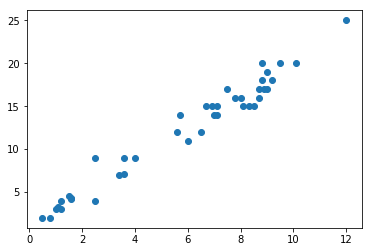

In [5]:
DataX=sampleData[:,0]
DataY=sampleData[:,1]
plt.scatter(DataX,DataY)

# 单变量线性拟和
$$f(x)=kx+b$$

# 线性回归（多变量）
$$f(x_1,x_2,...x_n)=w_1x_1+w_2x_2+...w_nx_n+b$$

## k 是斜率， b 是函数在y轴上的截距

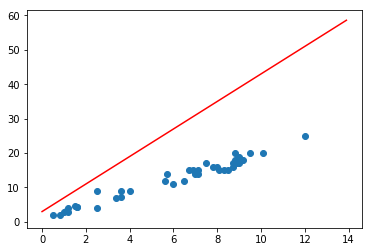

In [6]:
x=np.arange(0,14,0.1)
y=4*x+3
plt.plot(x,y,color='red')
plt.scatter(DataX,DataY)

## 梯度下降算法的数学原理

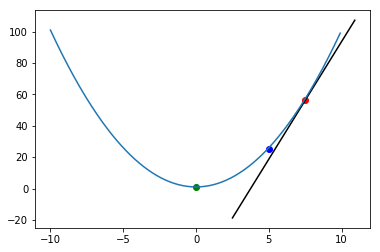

In [7]:
x=np.arange(-10,10,0.1)
y=x**2+1
plt.scatter(7.5,7.5**2,color='red')
plt.scatter(5,5**2,color='blue')
plt.scatter(0,1,color='green')
x1=np.arange(2.5,11,0.1)
y1=15*x1-7.5**2
plt.plot(x1,y1,color='black')
plt.plot(x,y)

红点要达到极值点绿点的位置，它应该怎样移动？

红点的位置减去该处的切线斜率乘一个步调，是不是就能使其到达蓝色点!

$$x_{i+1}=x_i-f'(x_i)*\varepsilon$$

# 梯度下降

## 均方误差
$$E(k,b)=\frac{1}{m}\sum_{i=1}^{m}(f(x_i)-y_i)^2$$

$$E(k,b)=\frac{1}{m}\sum_{i=1}^{m}(kx_i+b-y_i)^2$$


## 求偏导

$$\frac{\partial E(k,b)}{\partial k}=\frac{1}{m}\sum_{i=1}^{m}2(kx_i+b-y_i)x_i$$

$$\frac{\partial E(k,b)}{\partial b}=\frac{1}{m}\sum_{i=1}^{m}2(kx_i+b-y_i)$$

In [8]:
def Ekb(k,b,X,Y):
    Error=0
    m=len(X)
    for i in range(m):
        Error+=(k*X[i]+b-Y[i])**2
    Error/=m
    return Error

In [9]:
def PartEkb(k,b,X,Y):
    pk=0
    pb=0
    m=len(X)
    for i in range(m):
        pk+=2*(k*X[i]+b-Y[i])*X[i]
        pb+=2*(k*X[i]+b-Y[i])
    pk=pk/m
    pb=pb/m
    return [pk,pb]

In [10]:
Ekb(3,1,DataX,DataY)

55.17780487804878

In [11]:
PartEkb(3,1,DataX,DataY)

[97.76829268292681, 12.75609756097561]

In [12]:
def GradDesent(startk,startb,X,Y,learn_rate,iternum):
    k=startk
    b=startb
    
    batch=100
    for i in range(iternum):
        k=k-PartEkb(k,b,X,Y)[0]*learn_rate
        b=b-PartEkb(k,b,X,Y)[1]*learn_rate
        
        if i%batch==0:
            print('iterm:{0}, Error:{1}'.format(i,Ekb(k,b,X,Y)))
    return [k,b]
        

In [13]:
GradDesent(2,1,DataX,DataY,0.01,1000)

iterm:0, Error:1.3493553227681738
iterm:100, Error:1.3349714126659344
iterm:200, Error:1.3315158018973696
iterm:300, Error:1.3301426600651751
iterm:400, Error:1.329597020345426
iterm:500, Error:1.3293802017351501
iterm:600, Error:1.329294045416135
iterm:700, Error:1.3292598098341584
iterm:800, Error:1.3292462057818188
iterm:900, Error:1.3292407999955176


[1.8661851641471332, 1.2472903087839682]

iterm:0, Error:153.14167092683576
iterm:100, Error:1.5433578420901706
iterm:200, Error:1.5247650016635743
iterm:300, Error:1.5077868005387143
iterm:400, Error:1.4922828621745408
iterm:500, Error:1.4781251724263933
iterm:600, Error:1.4651968329105487
iterm:700, Error:1.4533910958439602
iterm:800, Error:1.4426104826403403
iterm:900, Error:1.4327659790409013


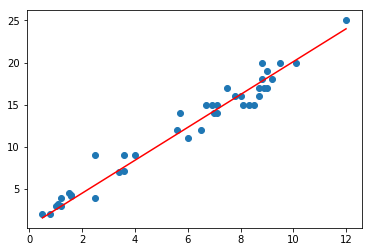

In [14]:
plt.scatter(DataX,DataY)
X=np.arange(DataX.min(),DataX.max(),0.01)
k,b=GradDesent(0,0,DataX,DataY,0.001,1000)
plt.plot(X,k*X+b,color='red')
plt.show()

# 数学公式

$$\frac{\partial E(k,b)}{\partial k}=\frac{1}{m}\sum_{i=1}^{m}2(kx_i+b-y_i)x_i=0$$

$$\frac{\partial E(k,b)}{\partial b}=\frac{1}{m}\sum_{i=1}^{m}2(kx_i+b-y_i)=0$$

令
$$\overline{x}=\frac{1}{m}\sum_{i=1}^{m}x_i$$

$$\overline{y}=\frac{1}{m}\sum_{i=1}^{m}y_i$$

得
$$b=\overline{y}-k\overline{x}$$

$$k=\frac{\sum_{i=1}^{m}(y_i-\overline{y})x_i}{\sum_{i=1}^{m}(x_i-\overline{x})x_i}$$

In [15]:
def mathk(DataX,DataY):
    fz=0
    fm=0
    m=len(DataX)
    meanx=np.mean(DataX)
    meany=np.mean(DataY)
    for i in range(m):
        fz+=(DataY[i]-meany)*DataX[i]
        fm+=(DataX[i]-meanx)*DataX[i]
        
    return fz/fm
    

In [16]:
def mathb(DataX,DataY):
    meany=np.mean(DataY)
    meanx=np.mean(DataX)
    
    k=mathk(DataX,DataY)
    return meany-k*meanx

In [17]:
mathk(DataX,DataY)

1.8658557134722433

In [18]:
mathb(DataX,DataY)

1.2497797817573293

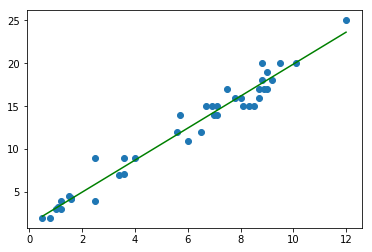

In [19]:
plt.scatter(DataX,DataY)
X=np.arange(DataX.min(),DataX.max(),0.01)
k,b=mathk(DataX,DataY),mathb(DataX,DataY)
plt.plot(X,k*X+b,color='green')
plt.show()

# 梯度下降(<font color='red'>红线</font>) Vs 数学公式(<font color='green'>绿线</font>)

iterm:0, Error:153.14167092683576
iterm:100, Error:1.5433578420901706
iterm:200, Error:1.5247650016635743
iterm:300, Error:1.5077868005387143
iterm:400, Error:1.4922828621745408
iterm:500, Error:1.4781251724263933
iterm:600, Error:1.4651968329105487
iterm:700, Error:1.4533910958439602
iterm:800, Error:1.4426104826403403
iterm:900, Error:1.4327659790409013


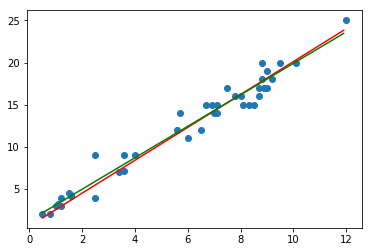

In [20]:
plt.scatter(DataX,DataY)
X=np.arange(DataX.min(),DataX.max(),0.1)

k,b=GradDesent(0,0,DataX,DataY,0.001,1000)

k1,b1=mathk(DataX,DataY),mathb(DataX,DataY)
plt.plot(X,k*X+b,color='red')
plt.plot(X,k1*X+b1,color='green')
